In [51]:
from utils import *

In [52]:
data = pd.read_excel("all-in-one.xlsx")
X = data[
    [
        'Length(ft)',
        'Year',
        'LWL (ft)',
        'Beam (ft)',
        'Draft (ft)',
        'Displacement (lbs)',
        'Sail area (sq ft)',
        'ACT(tons)',
        'GDP (USD billion)',
        'GDP per capita (USD)',
        'Logistics costs to GDP%',
        'Type',
    ]
]
Y = data['Listing Price (USD)']
hongKong = X.copy()
hongKong['ACT(tons)'] = 399200000
hongKong['GDP (USD billion)'] = 341
hongKong['GDP per capita (USD)'] = 45638
hongKong['Logistics costs to GDP%'] = 3.3
data.dtypes


Listing Price (USD)          int64
Length(ft)                 float64
Year                         int64
LWL (ft)                   float64
Beam (ft)                  float64
Draft (ft)                 float64
Displacement (lbs)           int64
Sail area (sq ft)            int64
ACT(tons)                    int64
GDP (USD billion)          float64
GDP per capita (USD)         int64
Logistics costs to GDP%    float64
Type                         int64
Make                        object
Variant                     object
Geographic Region           object
Country/Region/State        object
rf_HK_Price                float64
relative                   float64
dtype: object

In [53]:
# mlp = MLPRegressor(hidden_layer_sizes=32, max_iter=1000)
linReg = LinearRegression()
dt = DecisionTreeRegressor(max_depth=50, random_state=0)
rf = RandomForestRegressor(max_depth=20, n_estimators=1000, random_state=0)
lgbm = LGBMRegressor()
xgBoost = XGBRegressor()
models = linReg, dt, rf, lgbm, xgBoost
for model in models:
    train(model, X, Y)

model: LinearRegression:
平均绝对百分比误差: 1.069
r^2 score 0.6322995052166736
cost time: 0.012297391891479492 s

model: DecisionTreeRegressor:
平均绝对百分比误差: 0.033
r^2 score 0.9887999439156249
cost time: 0.025646448135375977 s

model: RandomForestRegressor:
平均绝对百分比误差: 0.071
r^2 score 0.9668545293130187
cost time: 14.26758074760437 s

model: LGBMRegressor:
平均绝对百分比误差: 0.122
r^2 score 0.9187027939526023
cost time: 0.13209843635559082 s

model: XGBRegressor:
平均绝对百分比误差: 0.080
r^2 score 0.9790214470408145
cost time: 0.17960715293884277 s



### 作图

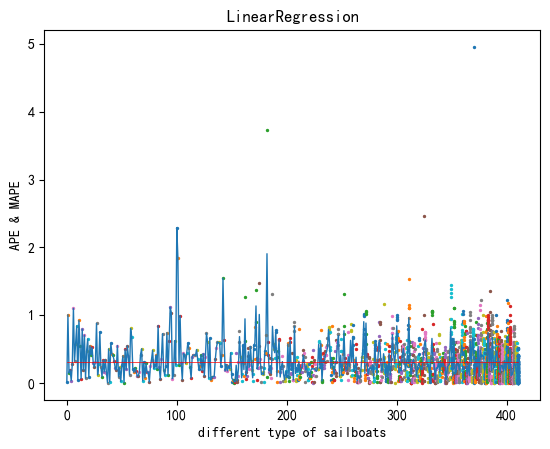

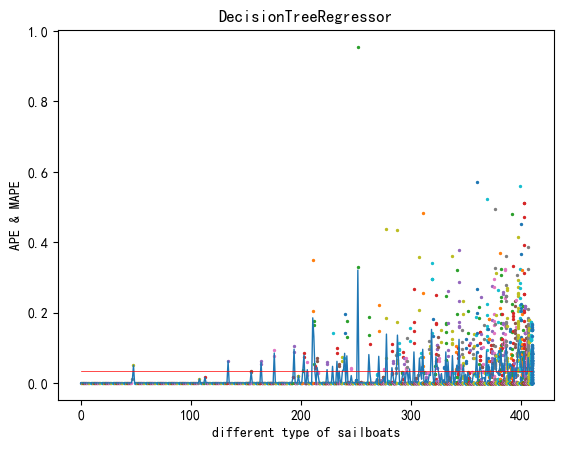

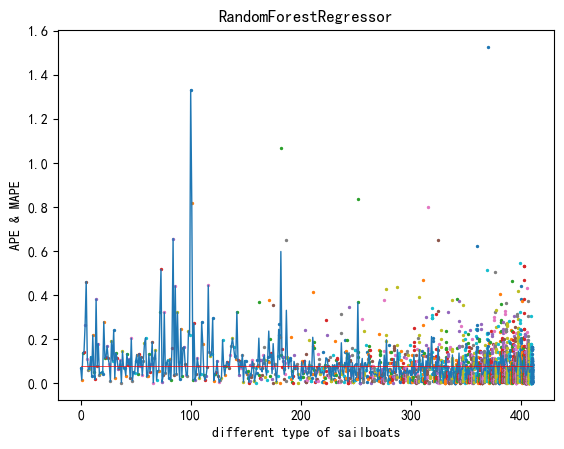

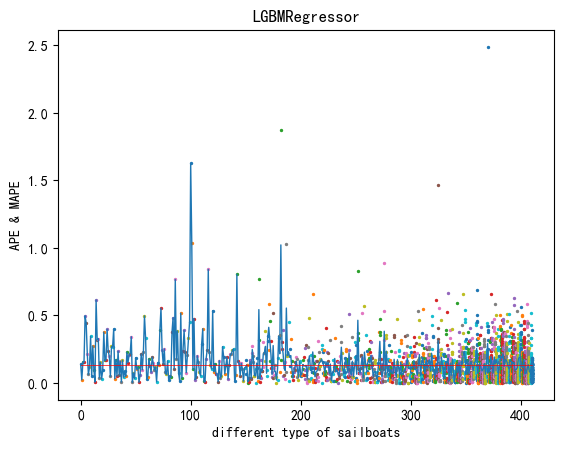

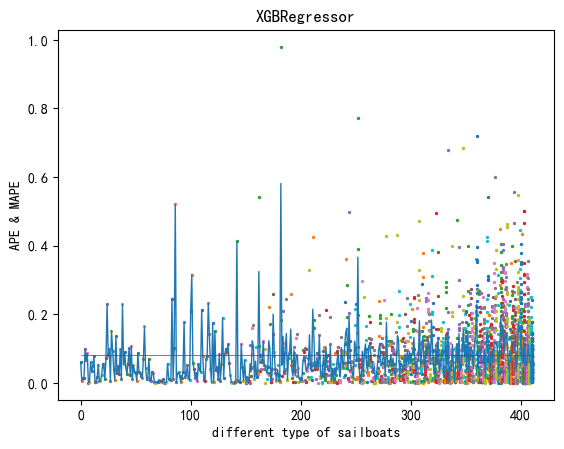

In [6]:
# 对于每种帆船，不同模型的 ape 和 mape 绘图
key = "Variant"
xAxis = np.unique(data[key])
xAxis = sorted(xAxis, key=lambda x: sum(data[key] == x))
for model in models:
    plt.figure()
    relative_ = abs(model.predict(X) / data["Listing Price (USD)"] - 1)
    mean = []
    for i, x in enumerate(xAxis):
        y = relative_[data[key] == x]
        mean.append(y.mean())
        plt.title(type(model).__name__)
        plt.xlabel("different type of sailboats")
        plt.ylabel("APE & MAPE")
        plt.scatter(np.full_like(y, i), y, s=2)
    plt.plot(range(len(mean)), mean, linewidth = 1)
    plt.plot(range(len(mean)), [relative_.mean()]*len(mean), color='r', linewidth=0.5)
    # num = np.array([sum(data[key] == i) for i in xAxis])
    # plt.plot(range(len(num)), num / num.max())


In [7]:
# 对于每种帆船，不同模型的 mape 导出
mapeTable = pd.DataFrame()
xAxis = np.unique(data[key])
xAxis = sorted(xAxis, key=lambda x: sum(data[key] == x))
mapeTable["Variant"] = xAxis
for model in models:
    relative_ = abs(model.predict(X) / data["Listing Price (USD)"] - 1)
    mean = np.array([relative_[data[key] == x].mean() for x in xAxis])
    mapeTable[type(model).__name__] = mean
mapeTable.to_excel("mape.xlsx", index=False)

### 灵敏度分析

In [54]:
X_name = [
        'Length(ft)',
        'Year',
        'LWL (ft)',
        'Beam (ft)',
        'Draft (ft)',
        'Displacement (lbs)',
        'Sail area (sq ft)',
        'ACT(tons)',
        'GDP (USD billion)',
        'GDP per capita (USD)',
        'Logistics costs to GDP%',
        'Type',
    ]
args = {label:(X[label].min(), X[label].max()) for label in X_name}
# for label in X_name:
#     print(X[label].min(), X[label].max())
si = sensitiveAnalyze(rf.predict, 15, **args)

LinearRegression
DecisionTreeRegressor
LGBMRegressor
XGBRegressor


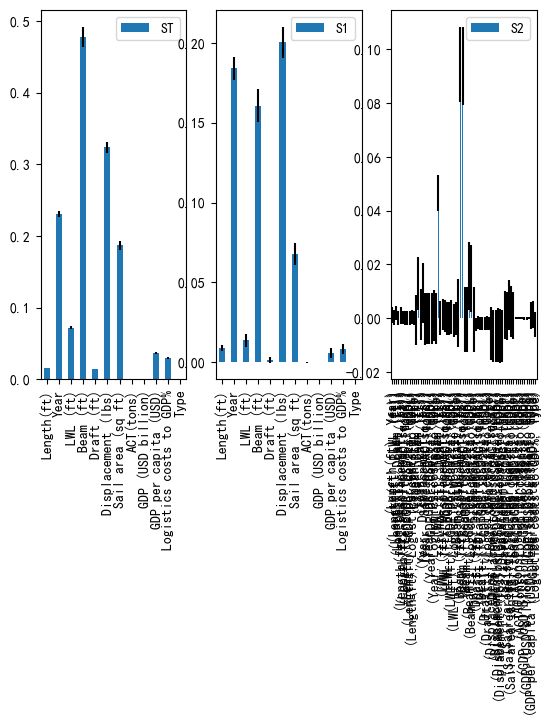

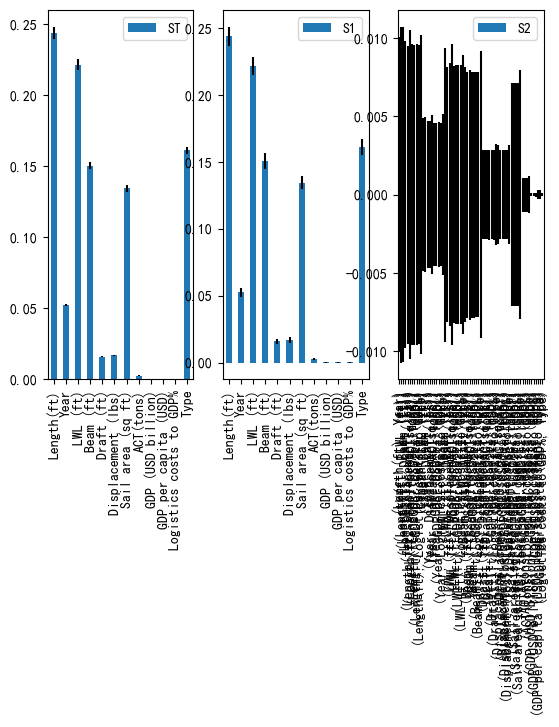

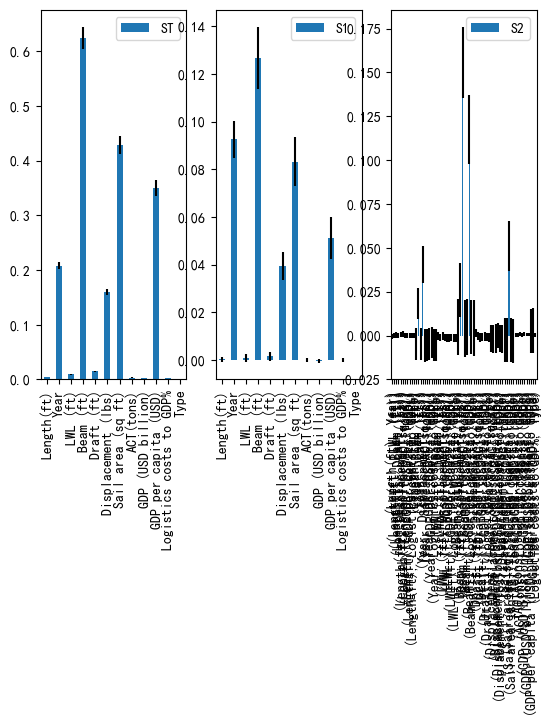

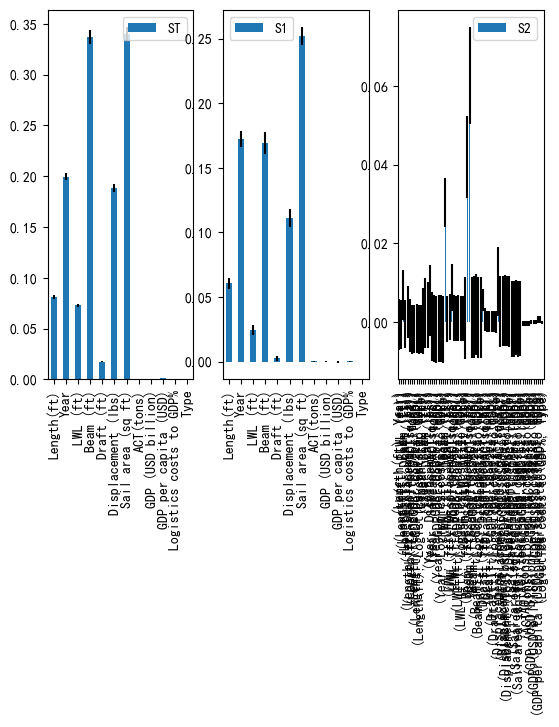

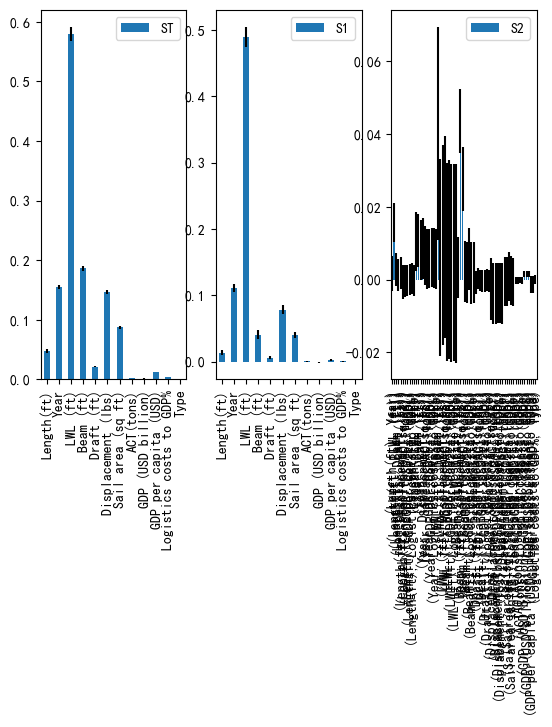

In [56]:
si.plot()
for model in linReg, dt, lgbm, xgBoost:
    print(type(model).__name__)
    sensitiveAnalyze(model.predict, 15, **args).plot()
# st, s1, _ = si.to_df()
# s2 = pd.DataFrame(si["S2"], index=X_name, columns=X_name)
# for i in range(len(X_name)):
#     for j in range(i, len(X_name)):
#         s2[X_name[i]][X_name[j]] = 1 if i==j else s2[X_name[j]][X_name[i]]
# with pd.ExcelWriter("grouped/sensitivity analyze.xlsx") as f:
#     st.to_excel(f, sheet_name="sensitivity total")
#     s1.to_excel(f, sheet_name="sensitivity 1st")
#     s2.to_excel(f, sheet_name="sensitivity 2st")


### 逐步回归

model: LinearRegression
r^2 = 0.6532800883406851
MAPE = 0.3019231693285278
丢弃 Sail area (sq ft) r = 0.6162368678856716
剩下 Length(ft) Year LWL (ft) Beam (ft) Draft (ft) Displacement (lbs) ACT(tons) GDP (USD billion) GDP per capita (USD) Logistics costs to GDP% Type

model: LinearRegression
r^2 = 0.6581090000524966
MAPE = 0.28903281932782093
丢弃 Beam (ft) r = 0.6133269892485956
剩下 Length(ft) Year LWL (ft) Draft (ft) Displacement (lbs) ACT(tons) GDP (USD billion) GDP per capita (USD) Logistics costs to GDP% Type

model: LinearRegression
r^2 = 0.6567425215739737
MAPE = 0.28390792564112816
丢弃 Displacement (lbs) r = 0.6059385958311164
剩下 Length(ft) Year LWL (ft) Draft (ft) ACT(tons) GDP (USD billion) GDP per capita (USD) Logistics costs to GDP% Type

model: LinearRegression
r^2 = 0.6478006879329025
MAPE = 0.297128777946166
丢弃 Type r = 0.5345515760919479
剩下 Length(ft) Year LWL (ft) Draft (ft) ACT(tons) GDP (USD billion) GDP per capita (USD) Logistics costs to GDP%

model: LinearRegression
r^2 

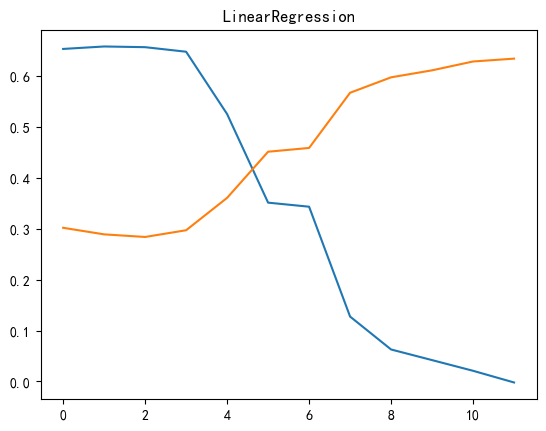

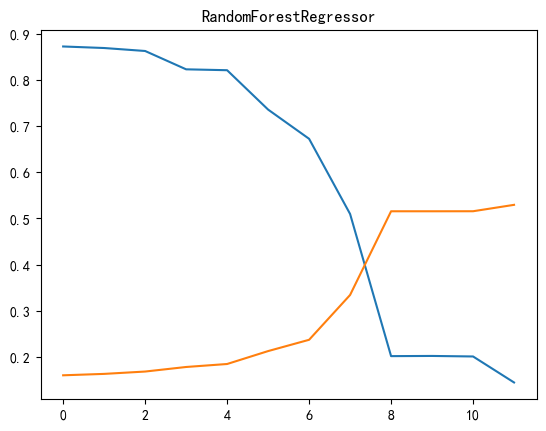

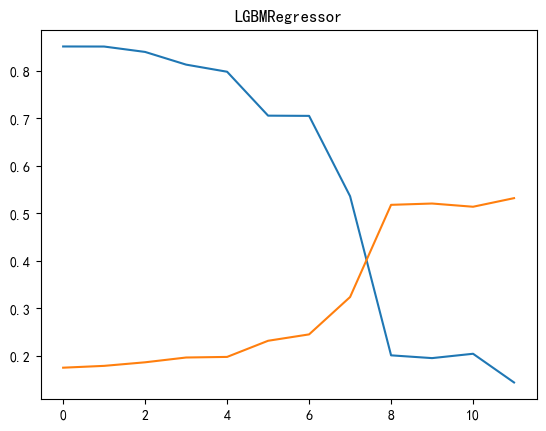

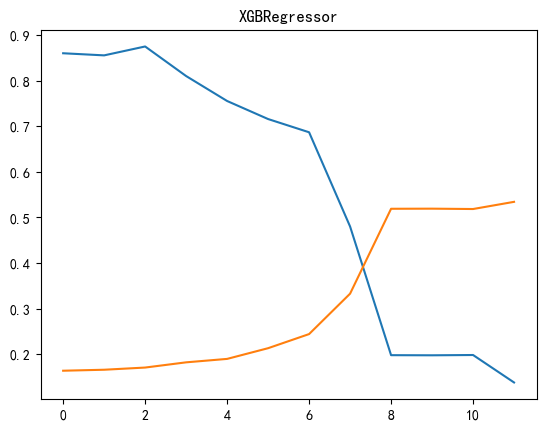

In [57]:
getModels = (
    (LinearRegression, {}),
    (RandomForestRegressor, {"max_depth": 20, "n_estimators": 1000, "random_state": 0}),
    (LGBMRegressor, {}),
    (XGBRegressor, {}),
)
r2Table = pd.DataFrame()
mapeTable = pd.DataFrame()
for getModel, args in getModels:
    X_step = X.copy()
    r2, mape_ = [], []
    for _ in range(12):
        model = getModel(**args)
        tr_x,te_x,tr_y,te_y=train_test_split(X_step ,Y,test_size=0.1,random_state=5)
        model.fit(tr_x, tr_y)
        Y_pred = model.predict(te_x)
        r2.append(r2_score(te_y, Y_pred))
        mape_.append(mape(te_y, Y_pred))
        print(f"model: {getModel.__name__}")
        print(f"r^2 = {r2[-1]}\nMAPE = {mape_[-1]}")
        r = [abs(pearson(X_step[i], Y)) for i in X_step.columns]
        minR = r.index(min(r))
        print("丢弃", X_step.columns[minR], "r =", min(r))
        X_step.drop(X_step.columns[minR], inplace=True, axis=1)
        print("剩下", ' '.join(X_step.columns))
        print()
    plt.figure()
    plt.title(getModel.__name__)
    plt.plot(range(len(r2)), r2)
    plt.plot(range(len(mape_)), mape_)
    r2Table[getModel.__name__] = r2
    mapeTable[getModel.__name__] = mape_


In [59]:
with pd.ExcelWriter("grouped/stepwise regression.xlsx") as f:
    r2Table.to_excel(f, index=False, sheet_name="r^2")
    mapeTable.to_excel(f, index=False, sheet_name="MAPE")